In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
dataset1 = pd.read_csv(r"C:\Users\HP\Downloads\Crude Oil Prices Daily.csv")
dataset1.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [9]:
dataset1.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [10]:
dataset1.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [11]:
dataset1.dropna(axis=0,inplace=True)

In [12]:
data_final=dataset1.reset_index()['Closing Value']

In [13]:
data_final

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_final=scaler.fit_transform(np.array(data_final).reshape(-1,1))

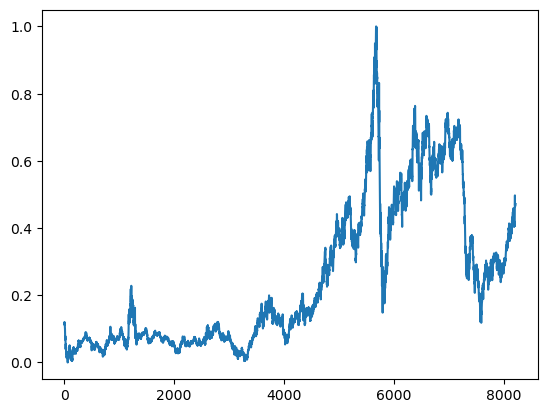

In [16]:
plt.plot(data_final)

In [17]:
training_size=int(len(data_final)*0.65)
test_size=len(data_final)-training_size
train_data,test_data=data_final[0:training_size,:],data_final[training_size:len(data_final),:1]

In [18]:
training_size,test_size

(5340, 2876)

In [19]:
train_data.shape

(5340, 1)

In [20]:
test_data.shape

(2876, 1)

In [21]:
def create_dataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [22]:
time_step=10
x_train, y_train= create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [23]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [24]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [25]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [1]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)


NameError: name 'x_train' is not defined

In [28]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
conda install tensorflow


In [29]:
model = Sequential()

In [30]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [31]:
model.add(Dense(1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 6s 69ms/step - loss: 8.2759e-05 - val_loss: 4.0892e-04
Epoch 2/50
84/84 [==============================] - 4s 47ms/step - loss: 7.5317e-05 - val_loss: 4.8240e-04
Epoch 3/50
84/84 [==============================] - 4s 49ms/step - loss: 7.9198e-05 - val_loss: 0.0010
Epoch 4/50
84/84 [==============================] - 6s 67ms/step - loss: 8.3020e-05 - val_loss: 3.3202e-04
Epoch 5/50
84/84 [==============================] - 4s 48ms/step - loss: 6.4561e-05 - val_loss: 3.6391e-04
Epoch 6/50
84/84 [==============================] - 4s 47ms/step - loss: 6.7649e-05 - val_loss: 3.4241e-04
Epoch 7/50
84/84 [==============================] - 5s 65ms/step - loss: 6.1172e-05 - val_loss: 2.9344e-04
Epoch 8/50
84/84 [==============================] - 6s 68ms/step - loss: 6.5263e-05 - val_loss: 5.5413e-04
Epoch 9/50
84/84 [==============================] - 4s 48ms/step - loss: 5.9849e-05 - val_loss: 3.9287e-04
Epoch 10/50
84/84 [======================

NameError: name 'train_predict' is not defined

In [37]:
from tensorflow.keras.models import load_model

model.save("data_final.h5")

In [38]:

len(test_data)

2876

In [39]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input


[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [45]:

lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        

0 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47458544]
0 day input [[0.4780081]]
1 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47458544 0.47800809]
1 day input [[0.48115236]]
2 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47458544 0.47800809 0.48115236]
2 day input [[0.48385763]]
3 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47458544 0.47800809 0.48115236 0.48385763]
3 day input [[0.48631832]]
4 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47458544
 0.47800809 0.48115236 0.48385763 0.48631832]
4 day input [[0.48859924]]
5 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47458544 0.47800809
 0.48115236 0.48385763 0.48631832 0.48859924]
5 day input [[0.49077198]]
6 day input [0.46497853 0.47038353 0.47149415 0.47458544 0.47800809 0.48115236
 0.4838576

In [46]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [47]:
len(data_final)

8216

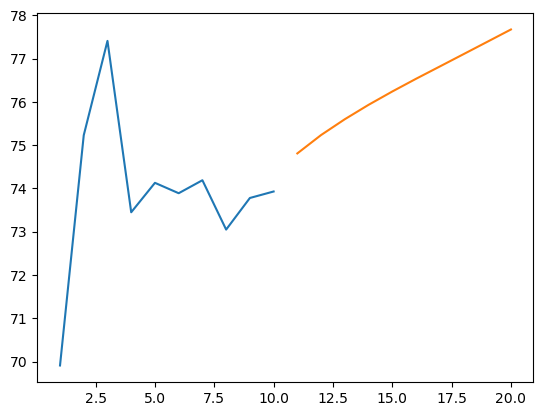

In [48]:
plt.plot(day_new,scaler.inverse_transform(data_final[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

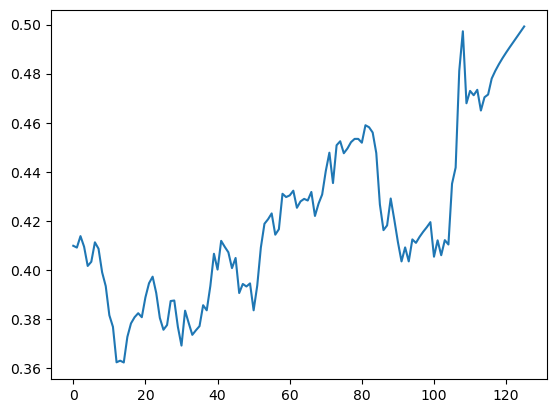

In [49]:
df3=data_final.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])